## Observations and Insights 

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata.head()
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = study_results.loc[study_results.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

clean_study = study_results[study_results['Mouse ID'].isin(duplicate_mouse)==False]
clean_mouse_df = mouse_metadata[mouse_metadata['Mouse ID'].isin(duplicate_mouse)==False]


combined_data = pd.merge(clean_study, clean_mouse_df, on = "Mouse ID")

#sort by Timepoint 
sort_by = combined_data.sort_values("Timepoint", ascending= True) 

#to reset index
all_sort = sort_by.reset_index()
del all_sort['index']
all_sort.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,v409,0,45.0,0,Placebo,Female,16,25
2,u946,0,45.0,0,Propriva,Male,5,30
3,w140,0,45.0,0,Zoniferol,Female,19,30
4,a577,0,45.0,0,Infubinol,Female,6,25


In [29]:
# Checking the number of mice in the clean DataFrame.
combined_data['Mouse ID'].value_counts()


c757    10
t718    10
a644    10
m601    10
c758    10
        ..
f932     1
n482     1
o848     1
t573     1
h428     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv,"SEM": sem})
summary_df
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [34]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
grouped_df = pd.DataFrame(combined_data.groupby(["Drug Regimen"]).count()).reset_index()
treatment_data = grouped_df[["Drug Regimen","Mouse ID"]]
treatment_data = treatment_data.rename(columns={"Mouse ID": "Mouse Count"})
treatment_data = treatment_data.set_index("Drug Regimen")

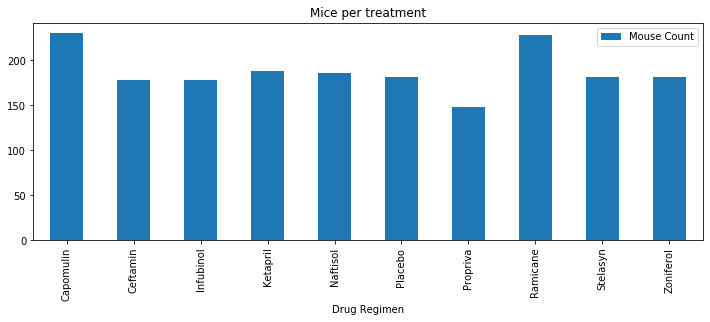

<Figure size 432x288 with 0 Axes>

In [35]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
treatment_data.plot(kind="bar", figsize=(12,4))
plt.title("Mice per treatment")

plt.show()
plt.tight_layout()

## Pie Plots

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = combined_data.groupby('Sex')
gender_group_count = pd.DataFrame(gender_group['Sex'].count())
gender_group_count.head()

,Sex
Sex,
Female,922
Male,958


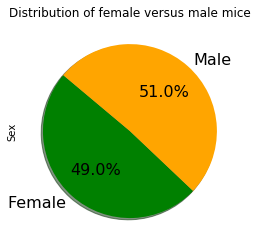

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_group_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female versus male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["green","orange"],legend =False)

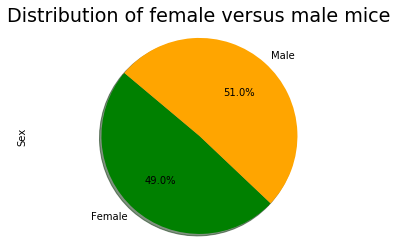

In [38]:
genders = list(gender_group_count.index.values)

gender_counts = gender_group_count['Sex']


colors = ["green", "orange"]

plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.savefig("PyplotPieChart.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
drug_list = ['Capomulin', 'Ketapril', 'Infubinol', 'Ceftamin']

four_drugs = combined_data[combined_data['Drug Regimen'].isin(drug_list)]

four_drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [42]:
quartiles = combined_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumor = combined_data.loc[(combined_data['Tumor Volume (mm3)'] < lower_bound) | (combined_data['Tumor Volume (mm3)'] > upper_bound)]
outlier_tumor

The lower quartile of occupancy is: 45.0
The upper quartile of occupancy is: 56.32407510749999
The interquartile range of occupancy is: 11.324075107499993
The the median of occupancy is: 48.933453655 
Values below 28.01388733875001 could be outliers.
Values above 73.31018776874998 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
40,h246,45,74.104086,2,Ketapril,Male,13,30
49,p189,40,74.106091,4,Ketapril,Male,8,28
50,p189,45,75.294936,4,Ketapril,Male,8,28
109,z969,45,73.867845,4,Naftisol,Male,9,30
154,l725,40,73.693494,3,Naftisol,Female,8,26
155,l725,45,76.668817,3,Naftisol,Female,8,26
180,a818,45,74.997764,2,Naftisol,Female,12,28
192,t724,45,75.113288,2,Naftisol,Female,2,25
202,k382,45,73.715619,4,Ketapril,Male,22,29
380,o331,45,78.567014,4,Ketapril,Male,24,30


TypeError: unsupported operand type(s) for /: 'str' and 'int'

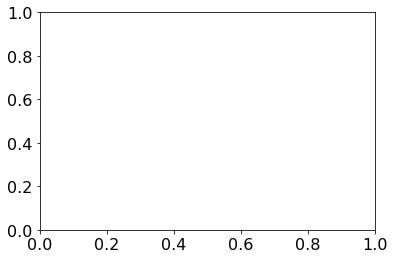

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
four_drugs.boxplot(by ='Drug Regimen', column =['Mouse ID'], grid = False) 
ax1.set_title('Tumor Volume for 4 regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

In [49]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
capomulin_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Correlation and Regression

In [63]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
cap_mouse_id = capomulin_data.groupby(['Mouse ID']).agg(\
        Mouse_weight=('Weight (g)', np.mean),\
        Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)\
).round(3)
cap_mouse_id.head(30)


,Mouse_weight,Tumor_vol_mean
Mouse ID,,
b128,22,41.964
b742,21,40.084
f966,17,36.506
g288,19,41.990
g316,22,44.613
i557,24,44.806
i738,20,39.141
j119,23,44.465
j246,21,43.217


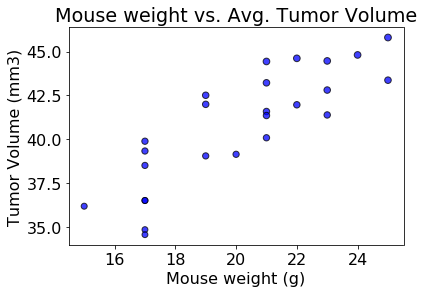

In [70]:
plt.scatter( 
    cap_mouse_id['Mouse_weight'],
    cap_mouse_id['Tumor_vol_mean'],
    marker='o',
    facecolors='blue',
    edgecolors='black',
    s=cap_mouse_id['Tumor_vol_mean'],
    alpha=0.75)

plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig("ScatterWeightTumorVol.png")

plt.show()

In [71]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_mouse_id['Mouse_weight'],cap_mouse_id['Tumor_vol_mean'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84
